# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Task-2" data-toc-modified-id="Task-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 2</a></div><div class="lev2 toc-item"><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>K-Means Clustering</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conclusion</a></div>

# Task 2

<em>Aggregate the referee information grouping by soccer player, and use an unsupervised learning technique to cluster the soccer players in 2 disjoint clusters. Remove features iteratively, and at each step perform again the clustering and compute the silhouette score -- can you find a configuration of features with high silhouette score where players with dark and light skin colors belong to different clusters? Discuss the obtained results.</em>

## K-Means Clustering

We want to cluster players into two groups. We have aggregated player records and binary classified the skin color in Task 1. In DataFrame player_data_bin, every row of a record corresponds to a player. We'll just import it and run kmeans over it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

We 'player_data_bin.csv' We drop NaN as it won't work with K-Means.

In [10]:
player_data_bin = pd.read_csv('player_data_bin.csv')
player_data_bin.drop('playerShort', axis=1, inplace=True)
players = player_data_bin.dropna()

In [11]:
player_data_bin[:2]

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,weightedIAT,weightedExp,...,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,skin_label
0,654,247,179,228,9,19,0,0,0.333195,0.400637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,336,141,73,122,62,42,0,1,0.341438,0.380811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
X = players.drop('skin_label', axis=1)
Y = players['skin_label']

We use KMeans as the clustering algorithm. Although it is unsupervised learning, but as we have skin_label in our data, we can also compute prediction accuracy of skin color.  
In the method below, we fit data in model and compute its silhouette score and prediction accuray.

In [13]:
# given the training data X, fit it return its silhoutte score and prediction accuracy
def cluster(X):
    kmeans = KMeans(n_clusters=2, init='k-means++')
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    accuracy = ((kmeans.labels_ == Y).sum() / len(Y))
    return sil_score, accuracy

To start with, let's have a try with all features.

In [14]:
newX = scale(X.as_matrix())
sil_score, accuracy = cluster(newX)
best_sil_score = sil_score
print('silhouette score with all features: ' + str(sil_score))
print('prediction accuracy with all features: ' + str(accuracy))

silhouette score with all features: 0.0543307095417
prediction accuracy with all features: 0.601023017903


In [15]:
accuracies = []
silhouette_scores = []
accuracies.append(accuracy)
silhouette_scores.append(sil_score)

In [16]:
n_iterations = X.shape[1] - 1

for i in range(n_iterations):
    for feature in X.columns:
        newX = scale(X.drop(feature, axis=1).as_matrix())#scale(X.drop(feature, axis=1).as_matrix())
        sil_score, accuracy = cluster(newX)#
        if sil_score > best_sil_score:
            best_sil_score = sil_score
            accuracies.append(accuracy)
            silhouette_scores.append(sil_score)
            X.drop(feature, axis=1, inplace=True)
            print('silhouette score: {0}   accuracy: {1}   removed {2}'.format(sil_score, accuracy, feature))
            break

silhouette score: 0.054473215762180074   accuracy: 0.5971867007672634   removed weightedIAT
silhouette score: 0.05567291838359836   accuracy: 0.5965473145780051   removed weightedExp
silhouette score: 0.056502347782623905   accuracy: 0.3983375959079284   removed height
silhouette score: 0.05665108545972927   accuracy: 0.4047314578005115   removed weight
silhouette score: 0.05833870529068569   accuracy: 0.39961636828644503   removed club_1. FC Nürnberg
silhouette score: 0.05959208206991105   accuracy: 0.600383631713555   removed club_1. FSV Mainz 05
silhouette score: 0.061098778364074915   accuracy: 0.39961636828644503   removed club_1899 Hoffenheim
silhouette score: 0.061594901569433716   accuracy: 0.39961636828644503   removed club_AC Ajaccio
silhouette score: 0.06173524730195875   accuracy: 0.600383631713555   removed club_AS Nancy
silhouette score: 0.061992011790610264   accuracy: 0.5959079283887468   removed club_AS Saint-Étienne
silhouette score: 0.06305172925486219   accuracy: 0.

We plot the graph of silhouette score and accuracy of different number of removed features.

(0, 1)

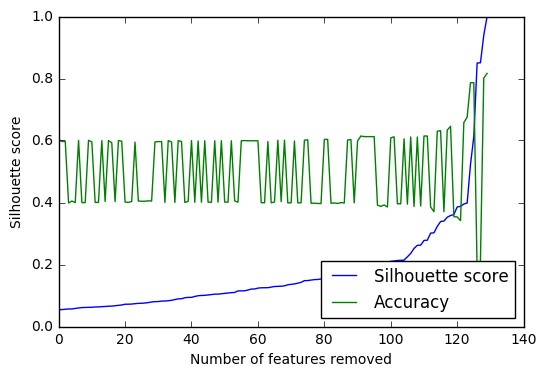

In [17]:
plt.figure()
plt.plot(silhouette_scores, label='Silhouette score')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Number of features removed')
plt.ylabel('Silhouette score')
plt.legend(loc='lower right')
plt.ylim([0,1])

## Conclusion

Silhoutte score can be improved with different accuracy, 

'position_Right Fullback' and 'position_Right Midfielder' obtained by dummy encoding 'position_Right' give best silhoutte scores and prediction accuracy of skin color.